# **Diseño de una Herramienta para la Detección de Arritmias Cardíacas en Electrocardiogramas utilizando Técnicas de Aprendizaje Automático**

# **Arritmia Prediction**: Monografía presentada​ para optar al título de ​Especialista en Analítica y Ciencia de Datos​

**Estudiantes:** <br>
Robinson Alvarez Patiño <br>
Alejandro Ruiz Luna

**Asesora:** <br>
Maria Bernarda Salazar Sánchez, PhD. e-mail: bernarda.salazar@udea.edu.co

<br>
Universidad de Antioquia <br>
​Facultad de Ingeniería​ <br>
​​Especialización en Analítica y Ciencia de Datos​ <br>
​​Medellín, Antioquia, Colombia​ <br>
2023




In [ ]:
!git clone https://github.com/Alejoruizl/Monografia

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, matthews_corrcoef, balanced_accuracy_score, mean_absolute_percentage_error

from mlxtend.plotting import plot_confusion_matrix

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

### **KNN. DataFullClass**

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Leer el archivo de datos
df = pd.read_excel('Monografia/Diagnostics.xlsx')

# Convertir variables categóricas en numéricas
for column in df.columns:
    if df[column].dtype == type(object):
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column].astype(str))

# Definir variables independientes y dependiente
X = df.drop(['Rhythm'], axis=1)
y = df['Rhythm']

# Separar conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y)

# Crear modelo KNN con 5 vecinos
knn = KNeighborsClassifier(n_neighbors=5)

# Entrenar modelo con conjunto de entrenamiento
knn.fit(X_train, y_train)

# Predecir etapa de arritmia en conjunto de prueba
y_pred = knn.predict(X_test)

# Evaluar rendimiento del modelo
score = knn.score(X_test, y_test)
print('Accuracy:', score)

Accuracy: 0.8037558685446009


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Accuracy
accuracy = accuracy_score(y_test, y_pred)

# Precision
precision = precision_score(y_test, y_pred, average='weighted')

# Recall
recall = recall_score(y_test, y_pred, average='weighted')

# F1-score
f1 = f1_score(y_test, y_pred, average='weighted')

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1-score:', f1)

Accuracy: 0.8037558685446009
Precision: 0.7997412162687862
Recall: 0.8037558685446009
F1-score: 0.7882416008396679


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion matrix, without normalization


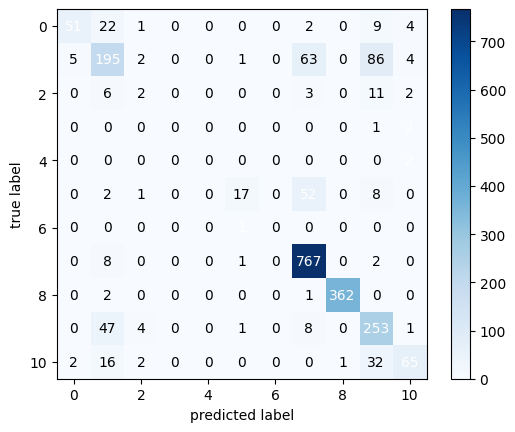

Normalized confusion matrix


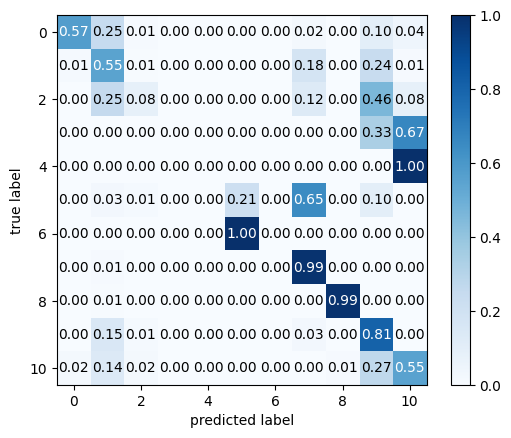

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

titles_options = [("Confusion matrix, without normalization", True, False),
                  ("Normalized confusion matrix", False, True)]

#class_names=['class_1','class_2','class_3','class_4','class_5','class_6','class_7','class_8','class_9','class_10','class_11']
multiclass = confusion_matrix(y_test, y_pred)

for title, absolute, normalize in titles_options:
     fig, ax = plot_confusion_matrix(conf_mat=multiclass,
                                colorbar=True,
                                show_absolute=absolute,
                                show_normed=normalize)
     print(title)
     plt.show()

### **RL. DataFullClass**

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Leer el archivo de datos
df = pd.read_excel('Monografia/Diagnostics.xlsx')

# Convertir variables categóricas en numéricas
for column in df.columns:
    if df[column].dtype == type(object):
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column].astype(str))

# Definir variables independientes y dependiente
X = df.drop(['Rhythm'], axis=1)
y = df['Rhythm']

# Separar conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y)

# Crear modelo RL
rl = LogisticRegression(random_state=0)

# Entrenar modelo con conjunto de entrenamiento
rl.fit(X_train, y_train)

# Predecir etapa de arritmia en conjunto de prueba
y_pred = rl.predict(X_test)

# Evaluar rendimiento del modelo
score = rl.score(X_test, y_test)
print('Accuracy:', score)

Accuracy: 0.7309859154929578


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Accuracy
accuracy = accuracy_score(y_test, y_pred)

# Precision
precision = precision_score(y_test, y_pred, average='weighted')

# Recall
recall = recall_score(y_test, y_pred, average='weighted')

# F1-score
f1 = f1_score(y_test, y_pred, average='weighted')

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1-score:', f1)

Accuracy: 0.7309859154929578
Precision: 0.7198221147457192
Recall: 0.7309859154929578
F1-score: 0.6989139969613689


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion matrix, without normalization


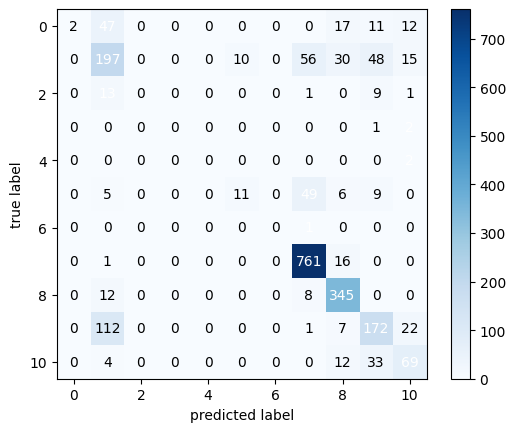

Normalized confusion matrix


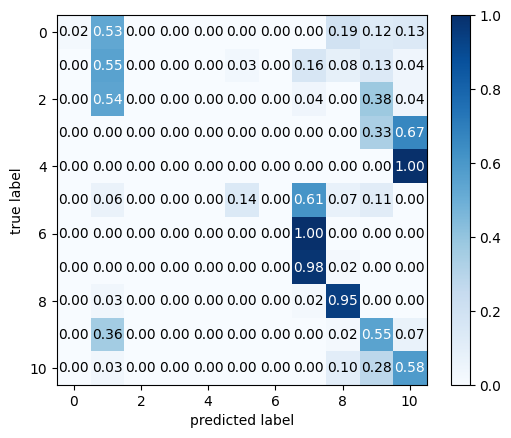

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

titles_options = [("Confusion matrix, without normalization", True, False),
                  ("Normalized confusion matrix", False, True)]

#class_names=['class_1','class_2','class_3','class_4','class_5','class_6','class_7','class_8','class_9','class_10','class_11']
multiclass = confusion_matrix(y_test, y_pred)

for title, absolute, normalize in titles_options:
     fig, ax = plot_confusion_matrix(conf_mat=multiclass,
                                colorbar=True,
                                show_absolute=absolute,
                                show_normed=normalize)
     print(title)
     plt.show()

### **CNN. DataFullClass**

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Leer el archivo de datos
df = pd.read_excel('Monografia/Diagnostics.xlsx')

# Convertir variables categóricas en numéricas
for column in df.columns:
    if df[column].dtype == type(object):
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column].astype(str))

# Definir variables independientes y dependiente
X = df.drop(['Rhythm'], axis=1)
y = df['Rhythm']

# Separar conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y)

# Definir arquitectura de la CNN
num_features = X_train.shape[1]
model = keras.Sequential(
    [
        layers.Input(shape=(num_features,)),  # Capa de entrada
        layers.Reshape((num_features, 1)),  # Reshape para que sea compatible con CNN
        layers.Conv1D(32, 3, activation="relu"),  # Capa de convolución 1
        layers.Conv1D(64, 3, activation="relu"),  # Capa de convolución 2
        layers.GlobalMaxPooling1D(),  # Capa de pooling
        layers.Dense(10, activation="relu"),  # Capa oculta
        layers.Dropout(0.5),  # Capa de dropout para evitar sobreajuste
        layers.Dense(1, activation="sigmoid"),  # Capa de salida binaria
    ]
)

# Compilar modelo
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Entrenar modelo con conjunto de entrenamiento
model.fit(X_train, y_train, epochs=1000, batch_size=32, validation_split=0.2)

# Evaluar rendimiento del modelo con conjunto de prueba
score = model.evaluate(X_test, y_test, verbose=0)
print('Accuracy:', score[1])


Epoch 1/1000
213/213 [==============================] - 3s 6ms/step - loss: -1686284.7500 - accuracy: 0.1676 - val_loss: -9825230.0000 - val_accuracy: 0.1608
Epoch 2/1000
213/213 [==============================] - 1s 5ms/step - loss: -76161944.0000 - accuracy: 0.1688 - val_loss: -212245888.0000 - val_accuracy: 0.1608
Epoch 3/1000
213/213 [==============================] - 1s 5ms/step - loss: -576992704.0000 - accuracy: 0.1688 - val_loss: -1135661824.0000 - val_accuracy: 0.1608
Epoch 4/1000
213/213 [==============================] - 1s 5ms/step - loss: -2151522816.0000 - accuracy: 0.1688 - val_loss: -3569282560.0000 - val_accuracy: 0.1608
Epoch 5/1000
213/213 [==============================] - 1s 5ms/step - loss: -5742749184.0000 - accuracy: 0.1688 - val_loss: -8439417344.0000 - val_accuracy: 0.1608
Epoch 6/1000
213/213 [==============================] - 1s 5ms/step - loss: -12069905408.0000 - accuracy: 0.1688 - val_loss: -16654166016.0000 - val_accuracy: 0.1608
Epoch 7/1000
213/213 [==

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Leer el archivo de datos
df = pd.read_excel('Monografia/Diagnostics.xlsx')

# Convertir variables categóricas en numéricas
for column in df.columns:
    if df[column].dtype == type(object):
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column].astype(str))

# Definir variables independientes y dependiente
X = df.drop(['Rhythm'], axis=1)
y = df['Rhythm']

# Separar conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y)

# Definir arquitectura de la CNN
num_features = X_train.shape[1]
model = keras.Sequential(
    [
        layers.Input(shape=(num_features, 1)),  # Capa de entrada
        layers.Conv1D(32, 3, activation="relu"),  # Capa de convolución 1
        layers.BatchNormalization(),  # Capa de normalización
        layers.Conv1D(64, 3, activation="relu"),  # Capa de convolución 2
        layers.BatchNormalization(),  # Capa de normalización
        layers.Conv1D(128, 3, activation="relu"),  # Capa de convolución 3
        layers.BatchNormalization(),  # Capa de normalización
        layers.GlobalMaxPooling1D(),  # Capa de pooling
        layers.Dense(64, activation="relu"),  # Capa oculta 1
        layers.Dropout(0.5),  # Capa de dropout para evitar sobreajuste
        layers.Dense(32, activation="relu"),  # Capa oculta 2
        layers.Dropout(0.5),  # Capa de dropout para evitar sobreajuste
        layers.Dense(1, activation="sigmoid"),  # Capa de salida binaria
    ]
)

# Compilar modelo
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Entrenar modelo con conjunto de entrenamiento
model.fit(X_train, y_train, epochs=1000, batch_size=32, validation_split=0.2)

# Evaluar rendimiento del modelo con conjunto de prueba
score = model.evaluate(X_test, y_test, verbose=0)
print('Accuracy:', score[1])

Epoch 1/1000
213/213 [==============================] - 5s 11ms/step - loss: -18365.3945 - accuracy: 0.1628 - val_loss: -73400.2734 - val_accuracy: 0.1690
Epoch 2/1000
213/213 [==============================] - 2s 9ms/step - loss: -501219.4375 - accuracy: 0.1668 - val_loss: -1288878.3750 - val_accuracy: 0.1690
Epoch 3/1000
213/213 [==============================] - 2s 10ms/step - loss: -3426847.2500 - accuracy: 0.1668 - val_loss: -4582708.5000 - val_accuracy: 0.1690
Epoch 4/1000
213/213 [==============================] - 3s 15ms/step - loss: -12501616.0000 - accuracy: 0.1668 - val_loss: -17196986.0000 - val_accuracy: 0.1690
Epoch 5/1000
213/213 [==============================] - 2s 11ms/step - loss: -32522562.0000 - accuracy: 0.1668 - val_loss: -51562160.0000 - val_accuracy: 0.1690
Epoch 6/1000
213/213 [==============================] - 2s 10ms/step - loss: -69275360.0000 - accuracy: 0.1668 - val_loss: -93198784.0000 - val_accuracy: 0.1690
Epoch 7/1000
213/213 [========================

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Accuracy
accuracy = accuracy_score(y_test, y_pred)

# Precision
precision = precision_score(y_test, y_pred, average='weighted')

# Recall
recall = recall_score(y_test, y_pred, average='weighted')

# F1-score
f1 = f1_score(y_test, y_pred, average='weighted')

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1-score:', f1)

Accuracy: 0.23568075117370893
Precision: 0.21277119124003507
Recall: 0.23568075117370893
F1-score: 0.2233573477313067


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### **SUMMARY**

In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Leer el archivo de datos
df = pd.read_excel('Monografia/Diagnostics.xlsx')

# Convertir variables categóricas en numéricas
for column in df.columns:
    if df[column].dtype == type(object):
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column].astype(str))

# Definir variables independientes y dependiente
X = df.drop(['Rhythm'], axis=1)
y = df['Rhythm']

# Separar conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=0)

# Definir modelos
models = {
    'Random Forest': RandomForestClassifier(random_state=0),
    'SVM': SVC(kernel='rbf', C=1.0, random_state=0),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Logistic Regression': LogisticRegression(random_state=0)
}

# Entrenar modelos y obtener métricas
results = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1-score': []}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    results['Model'].append(name)
    results['Accuracy'].append(accuracy)
    results['Precision'].append(precision)
    results['Recall'].append(recall)
    results['F1-score'].append(f1)

# Convertir resultados a DataFrame
df_results = pd.DataFrame(results)

# Presentar resultados en una tabla
print(df_results)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                 Model  Accuracy  Precision    Recall  F1-score
0        Random Forest  0.919718   0.910091  0.919718  0.911075
1                  SVM  0.612207   0.488806  0.612207  0.520024
2                  KNN  0.807042   0.798432  0.807042  0.789953
3  Logistic Regression  0.746948   0.733254  0.746948  0.719048


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### **KMeans. DataFullClass**

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Cargar los datos en un DataFrame
df = pd.read_excel('Monografia/Diagnostics.xlsx')
df.head()

,FileName,Rhythm,Beat,PatientAge,Gender,VentricularRate,AtrialRate,QRSDuration,QTInterval,QTCorrected,RAxis,TAxis,QRSCount,QOnset,QOffset,TOffset
0,MUSE_20180113_171327_27000,AFIB,RBBB TWC,85,MALE,117,234,114,356,496,81,-27,19,208,265,386
1,MUSE_20180112_073319_29000,SB,TWC,59,FEMALE,52,52,92,432,401,76,42,8,215,261,431
2,MUSE_20180111_165520_97000,SA,NONE,20,FEMALE,67,67,82,382,403,88,20,11,224,265,415
3,MUSE_20180113_121940_44000,SB,NONE,66,MALE,53,53,96,456,427,34,3,9,219,267,447
4,MUSE_20180112_122850_57000,AF,STDD STTC,73,FEMALE,162,162,114,252,413,68,-40,26,228,285,354


In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Cargar los datos en un DataFrame
df = pd.read_excel('Monografia/Diagnostics.xlsx')

# Eliminar la columna FileName
df = df.drop('FileName', axis=1)

# Convertir las columnas no numéricas a variables dummy (one-hot encoding)
df = pd.get_dummies(df)

# Realizar el clustering con K-means utilizando todas las variables
kmeans = KMeans(n_clusters=3, max_iter=10, n_init='auto')
kmeans.fit(df)

# Obtener las etiquetas de cluster asignadas a cada muestra
df['Cluster'] = kmeans.labels_

# Visualización de los clusters en un gráfico de pares
sns.pairplot(df, hue='Cluster', palette='viridis')
plt.suptitle('Clusters Generados por K-means')
plt.show()


In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Cargar los datos en un DataFrame
df = pd.read_excel('Monografia/Diagnostics.xlsx')

# Eliminar las columnas no numéricas
df = df.select_dtypes(include='number')

# Realizar el clustering con K-means utilizando todas las variables
kmeans = KMeans(n_clusters=3)
kmeans.fit(df)

# Obtener las etiquetas de cluster asignadas a cada muestra
df['Cluster'] = kmeans.labels_

# Visualización de los clusters en un gráfico de pares
sns.pairplot(df, hue='Cluster', palette='viridis')
plt.suptitle('Clusters Generados por K-means')
plt.show()

### **DBSCAN. DataFullClass**

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# Cargar los datos en un DataFrame
df = pd.read_excel('Monografia/Diagnostics.xlsx')

# Eliminar la columna FileName
df = df.drop('FileName', axis=1)

# Eliminar la columna Respuesta
df = df.drop('Rhythm', axis=1)

# Eliminar las columnas no numéricas
df = df.select_dtypes(include='number')

df



In [ ]:
# Crear una instancia del modelo DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)

# Ajustar el modelo a los datos
dbscan.fit(df)

# Obtener las etiquetas de cluster asignadas a cada muestra
df['Cluster'] = dbscan.labels_

# Visualización de los clusters en un gráfico de pares
sns.pairplot(df, hue='Cluster', palette='viridis')
plt.suptitle('Clusters Generados por DBSCAN con Dummes')
plt.show()

In [ ]:
df['Cluster'].unique()

### **MIniBatch KMeans. DataFullClass**

In [ ]:
from sklearn.cluster import MiniBatchKMeans

# Crear una instancia del modelo K-means Mini-Batch
kmeans = MiniBatchKMeans(batch_size=100)

# Ajustar el modelo a los datos
kmeans.fit(df)

# Obtener las etiquetas de cluster asignadas a cada muestra
df['Cluster'] = kmeans.labels_

# Visualización de los clusters en un gráfico de pares
sns.pairplot(df, hue='Cluster', palette='viridis')
plt.suptitle('Clusters Generados por K-means Mini-Batch con Dummes')
plt.show()

### **SpectralClustering. DataFullClass**

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.cluster import SpectralClustering
import matplotlib.pyplot as plt

# Load the data into a DataFrame
df = pd.read_excel('Monografia/Diagnostics.xlsx')

# Remove non-numeric columns
df = df.select_dtypes(include='number')

# Create a spectral clustering model
n_clusters = 3
model = SpectralClustering(n_clusters=n_clusters)

# Fit the model to the data
labels = model.fit_predict(df)

# Add the cluster labels to the DataFrame
df['Cluster'] = labels

# Visualize the clusters using a pairplot
sns.pairplot(df, hue='Cluster', palette='viridis')
plt.suptitle(f'Spectral Clustering with {n_clusters} Clusters')
plt.show()

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score

# Calcular las medidas de silueta
silhouette_avg = silhouette_score(df, kmeans.labels_)
silhouette_values = silhouette_samples(df, kmeans.labels_)

# Mostrar las medidas de silueta
print("Silhouette Score promedio: ", silhouette_avg)
print("Valores de Silhouette para cada muestra: ", silhouette_values)

### **Silueta. DataFullClass**

In [ ]:
# silueta de los clusters

from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans

###########  tratar datos #############

import pandas as pd
import seaborn as sns
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Cargar los datos en un DataFrame
df = pd.read_excel('Monografia/Diagnostics.xlsx')

# Eliminar la columna FileName
df = df.drop('FileName', axis=1)

# Eliminar la columna Respuesta
df = df.drop('Rhythm', axis=1)

# Eliminar las columnas no numéricas
df = df.select_dtypes(include='number')

X = df
########## k-means  ###########

n_clusters = 11

# Create a subplot with 1 row and 2 columns
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 7)

# The 1st subplot is the silhouette plot
# The silhouette coefficient can range from -1, 1 but in this example all
# lie within [-0.1, 1]
ax1.set_xlim([-0.1, 1])
# The (n_clusters+1)*10 is for inserting blank space between silhouette
# plots of individual clusters, to demarcate them clearly.
ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

# Initialize the clusterer with n_clusters value and a random generator
# seed of 10 for reproducibility.
clusterer = KMeans(n_clusters=n_clusters, n_init="auto", random_state=10)
cluster_labels = clusterer.fit_predict(X)
#n_clusters = clusterer.n_clusters

# The silhouette_score gives the average value for all the samples.
# This gives a perspective into the density and separation of the formed
# clusters
silhouette_avg = silhouette_score(X, cluster_labels)
print(
    "For n_clusters =",
    n_clusters,
    "The average silhouette_score is :",
    silhouette_avg,
)

# Compute the silhouette scores for each sample
sample_silhouette_values = silhouette_samples(X, cluster_labels)

y_lower = 10
for i in range(n_clusters):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clusters)
    ax1.fill_betweenx(
        np.arange(y_lower, y_upper),
        0,
        ith_cluster_silhouette_values,
        facecolor=color,
        edgecolor=color,
        alpha=0.7,
    )

    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

ax1.set_title("The silhouette plot for the various clusters.")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")

# The vertical line for average silhouette score of all the values
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

ax1.set_yticks([])  # Clear the yaxis labels / ticks
ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

# 2nd Plot showing the actual clusters formed
colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
ax2.scatter(
    X[:, 1], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
)

# Labeling the clusters
centers = clusterer.cluster_centers_
# Draw white circles at cluster centers
ax2.scatter(
    centers[:, 0],
    centers[:, 1],
    marker="o",
    c="white",
    alpha=1,
    s=200,
    edgecolor="k",
)

for i, c in enumerate(centers):
    ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

ax2.set_title("The visualization of the clustered data.")
ax2.set_xlabel("Feature space for the 1st feature")
ax2.set_ylabel("Feature space for the 2nd feature")

plt.suptitle(
    "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
    % n_clusters,
    fontsize=14,
    fontweight="bold",
)
plt.show()
